# Audio Synthesis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import butter, filtfilt,freqz, freqs, spectrogram

In [ ]:
SAMPLE_RATE = 44_100  # See https://en.wikipedia.org/wiki/Sampling_(signal_processing)

# Create a signal

In [ ]:
duration = 1
frequency = 440
t = np.linspace(0, duration, num=int(duration * SAMPLE_RATE))
y = np.sin(frequency * t * 2 * np.pi)


# Plot the signal

In [ ]:
single_cycle_end = int(
    1/frequency * len(y)
)

single_cycle = y[:single_cycle_end]

plt.plot(single_cycle);

In [ ]:
# Plot the whole signal. Note that it will not be very clear because of the lack of resolution
plt.plot(y[:1000]);

# Plot the frequency response curve

In [ ]:
def plot_frequency_response(y: np.ndarray):
    plt.magnitude_spectrum(y, Fs=SAMPLE_RATE, scale='dB')
    plt.title("Frequency Response")
    plt.show()

# Play the signal

In [ ]:
# Helper function so we can play np.ndarray as audio
def convert_to_audio(y):
    y *= 32767 / np.max(np.abs(y))
    y = y.astype(np.int16)
    return y
    

In [ ]:
audio = convert_to_audio(y)
ipd.Audio(audio, rate=SAMPLE_RATE)

# Create an amplifier

### Create the attack envelope

In [ ]:
# First, create the attack envelope. 
# Increase the signal from over a given duration
attack = ...  # in seconds
attack_amp = np.linspace(...)

In [ ]:
# Combine the amplifier and the original signal
amped_y = ...

plt.plot(amped_y);

### Implement Decay, Sustain and Release

In [ ]:
# Now, do the same thing for Decay, Sustain and Release
# Create one single envelope and combine it with the original signal

### Combine all envelopes into one

In [ ]:
amp = np.concatenate([...])

### Amplify the original signal

In [ ]:
amped_y = ...

### Trim the audio (removing zeros at start and end)

In [ ]:
amped_y = np.trim_zeros(amped_y)

# Plot the amplified signal

In [ ]:
plt.plot(amped_y);

# Play the amplified audio

In [ ]:
audio = convert_to_audio(amped_y)
ipd.Audio(audio, rate=SAMPLE_RATE)

# Filtering the audio

In [309]:
def plot_filter(b, a, cutoff):
    w, h = freqz(b, a, fs=SAMPLE_RATE)
    plt.semilogx(w, 20 * np.log10(abs(h)))
    plt.suptitle('Butterworth filter frequency response')
    plt.title("Cutoff where signal reached -3 dB")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [dB]')
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.axvline(cutoff, color='green') # cutoff frequency
    
    plt.show()



def butter_filter(data: np.ndarray, cutoff: float, order: int = 2, filter_type: str = 'lowpass', plot=False) -> np.ndarray:
    nyquist_frequency = 0.5 * SAMPLE_RATE
    normal_cutoff = cutoff / nyquist_frequency

    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)

    if plot:
        plot_filter(b, a, cutoff)

    # apply the filter to the signal
    y = filtfilt(b, a, data)
    return y

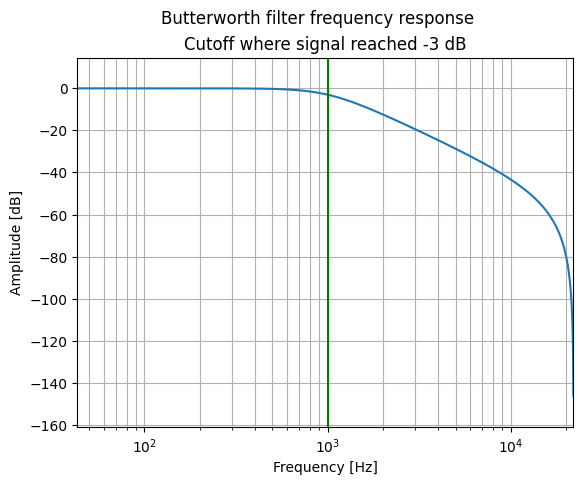

In [312]:
filter_frequency = 1000
filtered_signal = butter_filter(y, cutoff=filter_frequency, plot=True)